In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# preparing data
df_dataprev = pd.read_csv('../data/dataprev_data.csv', sep=';',  engine='python', encoding='utf-8')
df_categories = pd.read_csv('../data/tags_categorias_10_maio_22_junho.csv', sep=',',  engine='python', encoding='utf-8')

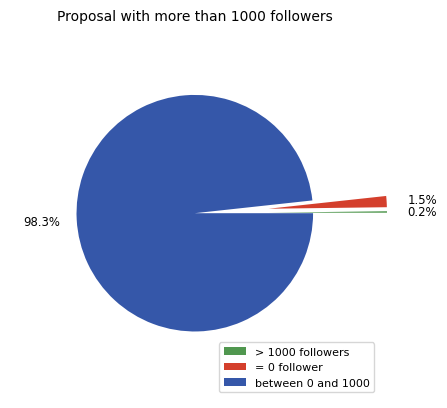

In [155]:
total_proposals = df_dataprev['followers'].count()

more_than_hundred_followers = df_dataprev[df_dataprev['followers'] >= 1000]['followers'].count()
zero_followers = df_dataprev[df_dataprev['followers'] == 0]['followers'].count()
rest = total_proposals - more_than_hundred_followers - zero_followers

fig, ax = plt.subplots()
values = [more_than_hundred_followers, zero_followers, rest]

ax.pie(values,
    colors=('#50974F', '#D43F2C', '#3557A9'),
    pctdistance=1.3,
    autopct='%1.1f%%',
    textprops={'size': 'smaller'},
    shadow=False,
    radius=0.8,
    explode=(0.5, 0.5, 0))

ax.set_title('Proposal with more than 1000 followers', fontsize=10)
ax.legend(['> 1000 followers', '= 0 follower', 'between 0 and 1000'], loc='lower right', fontsize=8)

plt.show()

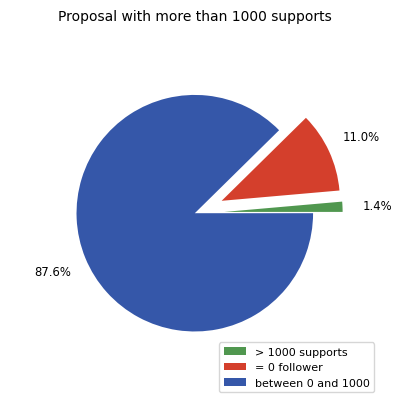

In [159]:
more_than_hundred_supports = df_dataprev[df_dataprev['supports'] >= 1000]['supports'].count()
zero_supports = df_dataprev[df_dataprev['supports'] == 0]['supports'].count()
rest = total_proposals - more_than_hundred_supports - zero_supports

fig, ax = plt.subplots()
values = [more_than_hundred_supports, zero_supports, rest]

ax.pie(values,
    colors=('#50974F', '#D43F2C', '#3557A9'),
    pctdistance=1.3,
    autopct='%1.1f%%',
    textprops={'size': 'smaller'},
    shadow=False,
    radius=0.8,
    explode=(0.2, 0.2, 0))

ax.set_title('Proposal with more than 1000 supports', fontsize=10)
ax.legend(['> 1000 supports', '= 0 follower', 'between 0 and 1000'], loc='lower right', fontsize=8)

plt.show()

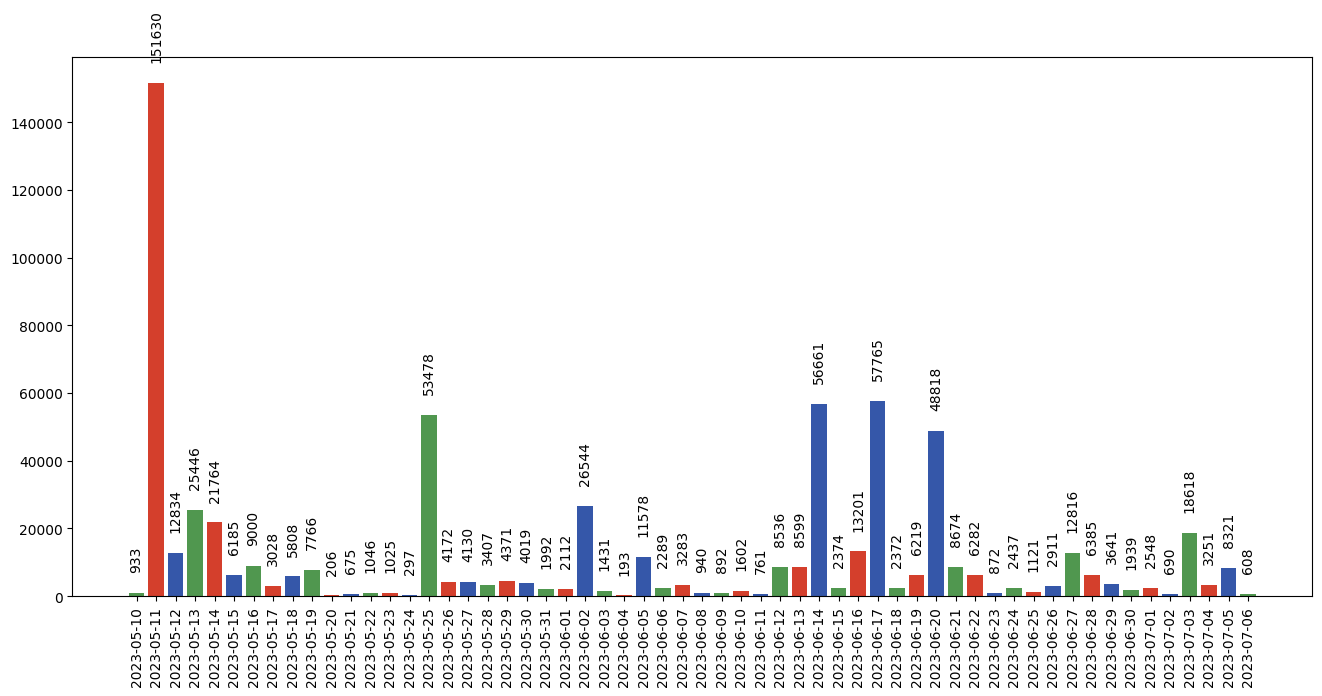

In [265]:
df_dataprev['published_date'] = df_dataprev['published_at'].str.split(" ", n = 1, expand=True)[0]
published_date_splited = df_dataprev['published_date'].str.split("-", n = 2, expand=True)
df_dataprev['published_date_formated'] = published_date_splited[2] + '/' + published_date_splited[1]

fig, ax = plt.subplots(figsize=(16,7))
number_of_published_date = df_dataprev.groupby(by='published_date')['supports'].sum()
values = number_of_published_date.tolist()
legend = list(df_dataprev.groupby(by='published_date_formated').groups.keys())


ax.bar(legend, values, color=['#50974F', '#D43F2C', '#3557A9'])
ax.bar_label(ax.containers[0], padding=15, rotation='vertical')
# ax.set_ylabel('fruit supply')
# ax.set_title('Fruit supply by kind and color')

plt.xticks(rotation='vertical')
plt.show()